# Exercise 5 Classification Tree

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix

# Problem 1(a)

In [2]:
hsedata = pd.read_csv('train.csv')

# CentralAir - SalePrice Dataset
saleprice = pd.DataFrame(hsedata['SalePrice']) #Predictor
centralair = pd.DataFrame(hsedata['CentralAir']) #Response

# Split Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(saleprice, centralair, test_size = 0.2)

In [3]:
# Decision Tree 1 (max depth 2) using Train Data
dectree1 = DecisionTreeClassifier(max_depth = 2) #creating decision tree object
dectree1.fit(X_train, y_train) # train decision tree model

# Decision Tree 2 (max depth 4) using Train Data
dectree2 = DecisionTreeClassifier(max_depth = 4) #creating decision tree object
dectree2.fit(X_train, y_train) #train decision tree model

# Predict CentralAir values corresponding to SalePrice using Decision Tree 1
y_train_pred1 = dectree1.predict(X_train)
y_test_pred1 = dectree1.predict(X_test)

# Predict CentralAir values corresponding to SalePrice using Decision Tree 2
y_train_pred2 = dectree2.predict(X_train)
y_test_pred2 = dectree2.predict(X_test)

### Decision Tree 1 with Depth 2

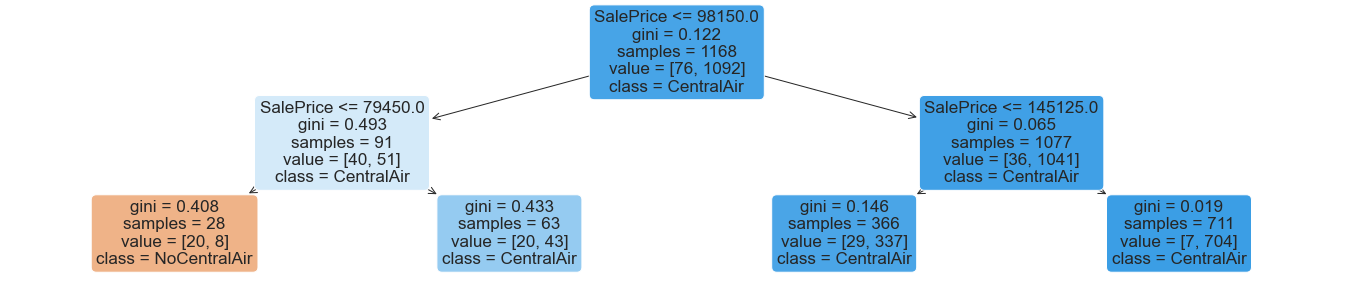

In [6]:
# Print dectree1
f = plt.figure(figsize=(24,5))
tree1 = plot_tree(dectree1, filled=True, rounded=True,
                    feature_names = X_train.columns,
                    class_names = ["NoCentralAir", "CentralAir"]) #class_names = ["False", "True"]


### Decision Tree 2 with Depth 4

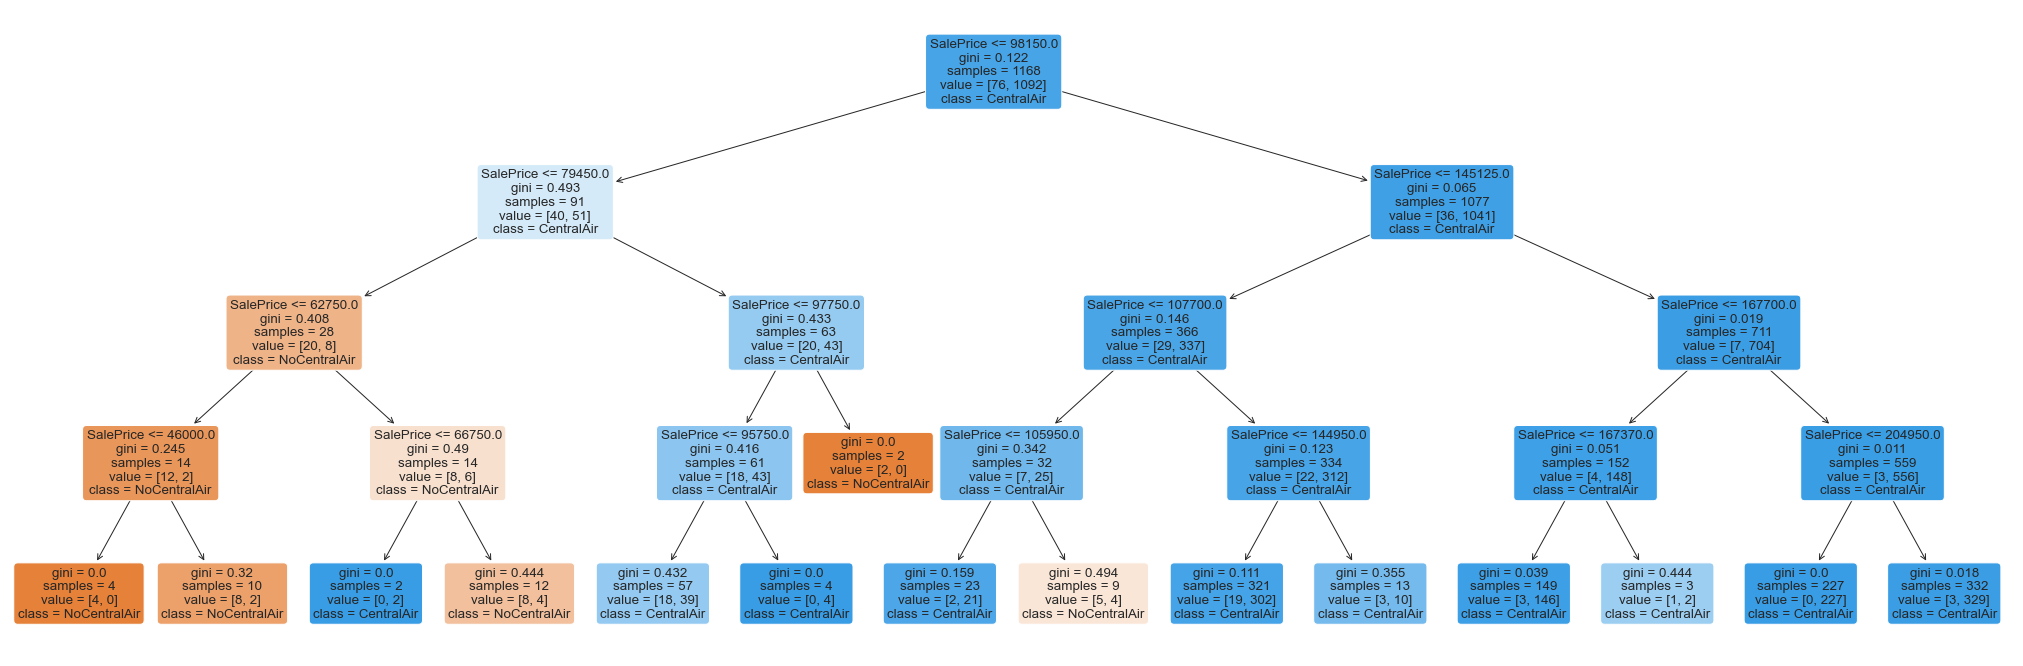

In [11]:
# Print dectree1
f = plt.figure(figsize=(36,12))
tree2 = plot_tree(dectree2, filled=True, rounded=True,
                    feature_names = X_train.columns,
                    class_names = ["NoCentralAir", "CentralAir"]) #class_names = ["False", "True"]


# Problem 1 (b)

### Dectree 1 model

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9452054794520548

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.928082191780822

Train Dataset
True Positive Rate 	: 0.9926739926739927
False Positive Rate 	: 0.7368421052631579
Test Dataset
True Positive Rate 	: 0.989010989010989
False Positive Rate 	: 0.9473684210526315


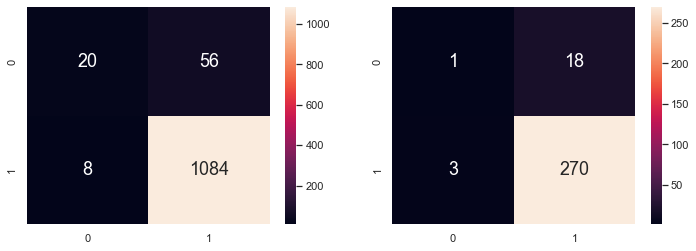

In [13]:
# Plot the two-way Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred1),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred1), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
cm1_train = confusion_matrix(y_train, y_train_pred1)
cm1_test = confusion_matrix(y_test, y_test_pred1)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree1.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree1.score(X_test, y_test))
print()

# Compute False Positive, False Negative, True Positive and True Negative for Train Dataset
TN1_train, FP1_train, FN1_train, TP1_train = cm1_train.ravel() # .ravel() return a contiguous 1D array

# Compute TPR and FPR for Train Dataset
TPR1_train = TP1_train/(TP1_train + FN1_train)
FPR1_train = FP1_train/(FP1_train + TN1_train)

# Print TPR and FPR for Train Dataset
print("Train Dataset")
print("True Positive Rate \t:", TPR1_train)
print("False Positive Rate \t:", FPR1_train)

# Compute False Positive, False Negative, True Positive and True Negative for Test Dataset
TN1_test, FP1_test, FN1_test, TP1_test = cm1_test.ravel() # .ravel() return a contiguous 1D array

# Compute TPR and FPR for Test Dataset
TPR1_test = TP1_test/(TP1_test + FN1_test)
FPR1_test = FP1_test/(FP1_test + TN1_test)

# Print TPR and FPR for Test Dataset
print("Test Dataset")
print("True Positive Rate \t:", TPR1_test)
print("False Positive Rate \t:", FPR1_test)

### Dectree 2 model

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.949486301369863

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9246575342465754

	Train Dataset
True Positive Rate 	: 0.9908424908424909
False Positive Rate 	: 0.6447368421052632
	Test Dataset
True Positive Rate 	: 0.978021978021978
False Positive Rate 	: 0.8421052631578947


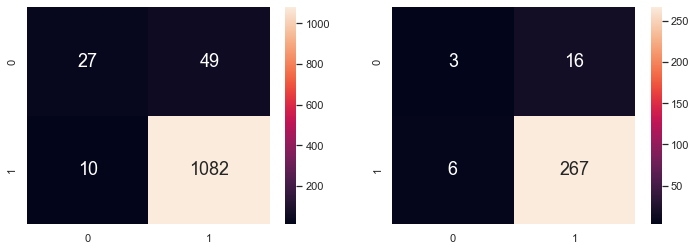

In [14]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred2),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred2), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
cm2_train=confusion_matrix(y_train, y_train_pred2)
cm2_test=confusion_matrix(y_test, y_test_pred2)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree2.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree2.score(X_test, y_test))
print()

# Compute False Positive, False Negative, True Positive and True Negative for Train Dataset
TN2_train, FP2_train, FN2_train, TP2_train = cm2_train.ravel() # .ravel() return a contiguous 1D array

# Compute TPR and FPR for Train Dataset
TPR2_train = TP2_train/(TP2_train + FN2_train)
FPR2_train = FP2_train/(FP2_train + TN2_train)

# Print TPR and FPR for Train Dataset
print("\tTrain Dataset")
print("True Positive Rate \t:", TPR2_train)
print("False Positive Rate \t:", FPR2_train)

# Compute False Positive, False Negative, True Positive and True Negative for Test Dataset
TN2_test, FP2_test, FN2_test, TP2_test = cm2_test.ravel() # .ravel() return a contiguous 1D array

# Compute TPR and FPR for Test Dataset
TPR2_test = TP2_test/(TP2_test + FN2_test)
FPR2_test = FP2_test/(FP2_test + TN2_test)

# Print TPR and FPR for Test Dataset
print("\tTest Dataset")
print("True Positive Rate \t:", TPR2_test)
print("False Positive Rate \t:", FPR2_test)

# Problem 2

### Using overallqual to predict centralair

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9426369863013698

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.928082191780822

	Train Dataset
True Positive Rate 	: 0.9945205479452055
False Positive Rate 	: 0.8356164383561644
	Test Dataset
True Positive Rate 	: 0.9888888888888889
False Positive Rate 	: 0.8181818181818182


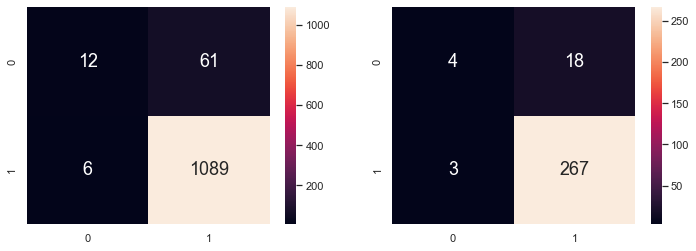

In [15]:
# CentralAir - OverallQual Dataset
overallqual = pd.DataFrame(hsedata['OverallQual']) #Predictor
centralair = pd.DataFrame(hsedata['CentralAir']) #Response

# Split Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(overallqual, centralair, test_size = 0.2)

# Decision Tree using Train Data
dectree3 = DecisionTreeClassifier(max_depth = 4) #creating decision tree object
dectree3.fit(X_train, y_train) # train decision tree model

# Predict CentralAir values corresponding to OverallQual
y_train_pred3 = dectree3.predict(X_train)
y_test_pred3 = dectree3.predict(X_test)

# Plot the two-way Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred3),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred3), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
cm3_train = confusion_matrix(y_train, y_train_pred3)
cm3_test = confusion_matrix(y_test, y_test_pred3)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree3.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree3.score(X_test, y_test))
print()

# Compute False Positive, False Negative, True Positive and True Negative for Train Dataset
TN3_train, FP3_train, FN3_train, TP3_train = cm3_train.ravel() # .ravel() return a contiguous 1D array

# Compute TPR and FPR for Train Dataset
TPR3_train = TP3_train/(TP3_train + FN3_train)
FPR3_train = FP3_train/(FP3_train + TN3_train)

# Print TPR and FPR for Train Dataset
print("\tTrain Dataset")
print("True Positive Rate \t:", TPR3_train)
print("False Positive Rate \t:", FPR3_train)

# Compute False Positive, False Negative, True Positive and True Negative for Test Dataset
TN3_test, FP3_test, FN3_test, TP3_test = cm3_test.ravel() # .ravel() return a contiguous 1D array

# Compute TPR and FPR for Test Dataset
TPR3_test = TP3_test/(TP3_test + FN3_test)
FPR3_test = FP3_test/(FP3_test + TN3_test)

# Print TPR and FPR for Test Dataset
print("\tTest Dataset")
print("True Positive Rate \t:", TPR3_test)
print("False Positive Rate \t:", FPR3_test)

### Using yearbuilt to predict centralair

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9383561643835616

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.928082191780822

	Train Dataset
True Positive Rate 	: 1.0
False Positive Rate 	: 0.972972972972973
	Test Dataset
True Positive Rate 	: 1.0
False Positive Rate 	: 1.0


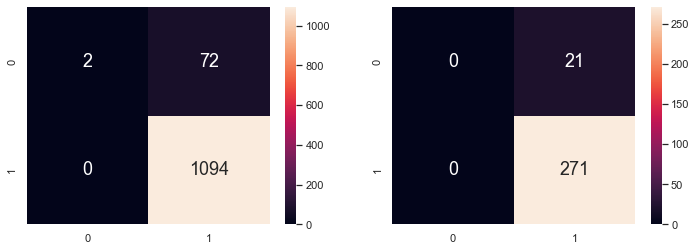

In [16]:
# CentralAir - YearBuilt Dataset
YearBuilt = pd.DataFrame(hsedata['YearBuilt']) #Predictor
CentralAir = pd.DataFrame(hsedata['CentralAir']) #Response

# Split Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(YearBuilt, CentralAir, test_size = 0.2)

# Decision Tree using Train Data
dectree4 = DecisionTreeClassifier(max_depth = 4) #creating decision tree object
dectree4.fit(X_train, y_train) # train decision tree model

# Predict CentralAir values corresponding to OverallQual
y_train_pred4 = dectree4.predict(X_train)
y_test_pred4 = dectree4.predict(X_test)

# Plot the two-way Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred4),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred4), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
cm4_train = confusion_matrix(y_train, y_train_pred4)
cm4_test = confusion_matrix(y_test, y_test_pred4)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree4.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree4.score(X_test, y_test))
print()

# Compute False Positive, False Negative, True Positive and True Negative for Train Dataset
TN4_train, FP4_train, FN4_train, TP4_train = cm4_train.ravel() # .ravel() return a contiguous 1D array

# Compute TPR and FPR for Train Dataset
TPR4_train = TP4_train/(TP4_train + FN4_train)
FPR4_train = FP4_train/(FP4_train + TN4_train)

# Print TPR and FPR for Train Dataset
print("\tTrain Dataset")
print("True Positive Rate \t:", TPR4_train)
print("False Positive Rate \t:", FPR4_train)

# Compute False Positive, False Negative, True Positive and True Negative for Test Dataset
TN4_test, FP4_test, FN4_test, TP4_test = cm4_test.ravel() # .ravel() return a contiguous 1D array

# Compute TPR and FPR for Test Dataset
TPR4_test = TP4_test/(TP4_test + FN4_test)
FPR4_test = FP4_test/(FP4_test + TN4_test)

# Print TPR and FPR for Test Dataset
print("\tTest Dataset")
print("True Positive Rate \t:", TPR4_test)
print("False Positive Rate \t:", FPR4_test)

# Problem 3(a)

### Printing the classification tree of 1(b)

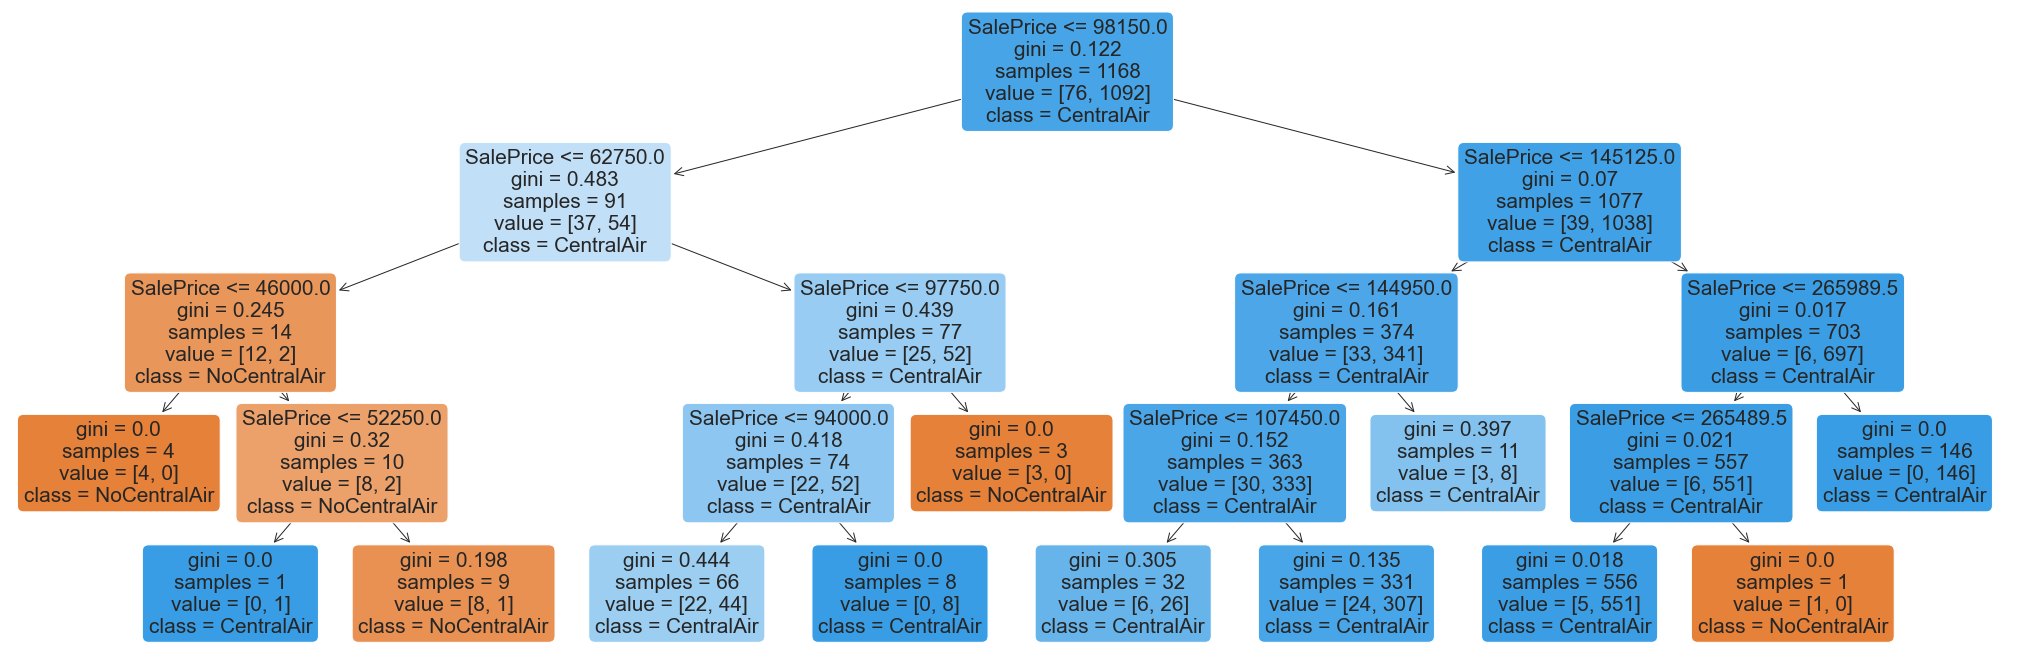

In [22]:
hsedata = pd.read_csv('train.csv')

# CentralAir - SalePrice Dataset
saleprice = pd.DataFrame(hsedata['SalePrice']) #Predictor
centralair = pd.DataFrame(hsedata['CentralAir']) #Response

# Split Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(saleprice, centralair, test_size = 0.2)

# Decision Tree 2 (max depth 4) using Train Data
dectree2 = DecisionTreeClassifier(max_depth = 4) #creating decision tree object
dectree2.fit(X_train, y_train) #train decision tree model

# Predict CentralAir values corresponding to SalePrice using Decision Tree 2
y_train_pred2 = dectree2.predict(X_train)
y_test_pred2 = dectree2.predict(X_test)

# Print dectree2
f = plt.figure(figsize=(36,12))
tree2 = plot_tree(dectree2, filled=True, rounded=True,
                    feature_names = X_train.columns,
                    class_names = ["NoCentralAir", "CentralAir"]) #class_names = ["False", "True"]


In [24]:
jointDF = pd.concat([X_train,y_train], axis = 1).reindex(X_train.index)
mostFP = jointDF[(jointDF["SalePrice"] <= 98150.0) & (jointDF["SalePrice"] > 62750.0) & (jointDF["SalePrice"] <= 97750.0) & (jointDF["SalePrice"] <= 94000.0)]
mostFP

,SalePrice,CentralAir
383,76000,N
614,75500,Y
398,67000,Y
637,93000,Y
489,86000,Y
...,...,...
1062,90000,N
874,66500,Y
1219,91500,Y
68,80000,Y


# Problem 3(b)

### Printing out only the false positive cases (22cases)

In [25]:
mostFP_onlyFP = mostFP[mostFP["CentralAir"] == 'N']
mostFP_onlyFP

,SalePrice,CentralAir
383,76000,N
912,88000,N
998,91000,N
1090,92900,N
620,67000,N
329,78000,N
1013,85000,N
342,87500,N
39,82000,N
242,79000,N
